<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4 - Polynomial Regression</b></center>    
<pre>    

# Importing the libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the libraries

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("Position_Salaries.csv")

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Plot the data using scatter plot

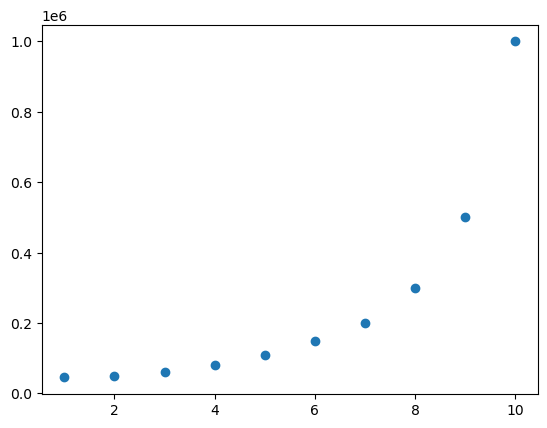

In [7]:
plt.scatter(df['Level'], df['Salary'])
plt.show()

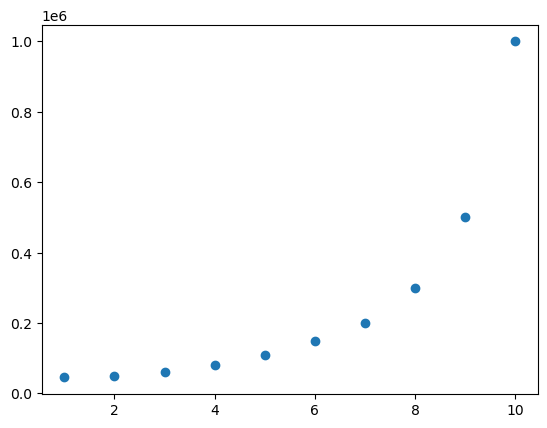

In [9]:
x = df.drop(['Position','Salary'],axis=1)
y = df['Salary']
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [24]:
x_test

,Level
2,3
0,1
7,8


# Fitting Linear Regression to the dataset

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Predict the x_test using Linear Model

In [30]:
y_predict = model.predict(x_test)
# print("---------- Y Test -----------")
# print(y_predict)

# Visualising the Linear Regression results

In [33]:
y_test

2     60000
0     45000
7    300000
Name: Salary, dtype: int64

In [32]:
y_predict

array([ -32195.12195122, -242682.92682927,  494024.3902439 ])

array([ 596551.72413793,  299568.96551724, -195402.29885057])

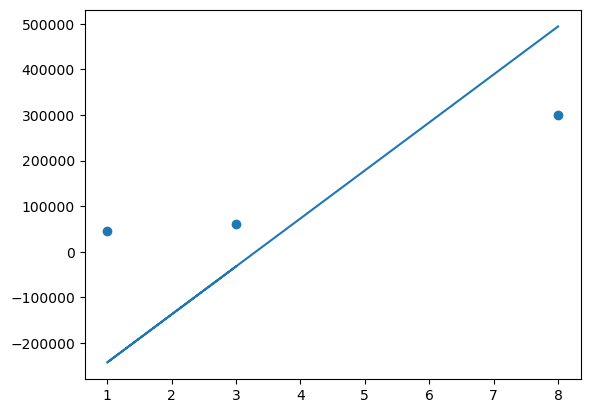

In [35]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)
plt.show()

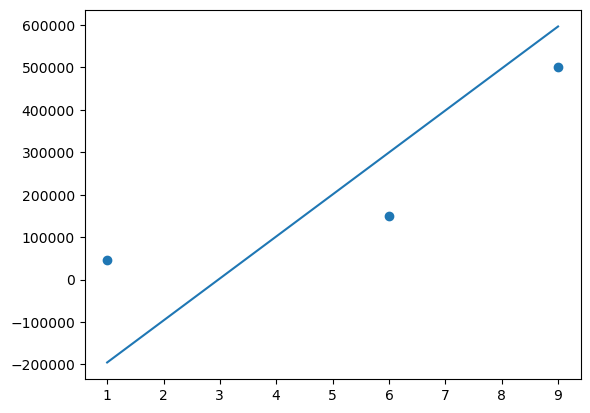

In [38]:
rss = np.sum((y_test - y_predict)**2)
tss = np.sum((y_test - np.mean(y_test))**2)

r_sq = 1 - (rss / tss)
r_sq

np.float64(-2.1479089355353493)

29828792057.515324

In [36]:
rss = np.sum((y_test.values - y_predict) ** 2)

In [37]:
rss

np.float64(128906870910.17255)

# Fitting Polynomial Regression to the dataset

## import  PolynomialFeatures

In [41]:
from sklearn.preprocessing import PolynomialFeatures

## create PolynomialFeatures of degree 4

In [61]:
poly = PolynomialFeatures(degree=8)
poly

PolynomialFeatures(degree=8)

## Apply fit_transform to features

In [62]:
x_poly = poly.fit_transform(x_train)
x_train

,Level
6,7
5,6
1,2
3,4
8,9
9,10
4,5


## View new  Features

In [63]:
x_poly

array([[1.0000000e+00, 7.0000000e+00, 4.9000000e+01, 3.4300000e+02,
        2.4010000e+03, 1.6807000e+04, 1.1764900e+05, 8.2354300e+05,
        5.7648010e+06],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02,
        1.2960000e+03, 7.7760000e+03, 4.6656000e+04, 2.7993600e+05,
        1.6796160e+06],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
        1.6000000e+01, 3.2000000e+01, 6.4000000e+01, 1.2800000e+02,
        2.5600000e+02],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01,
        2.5600000e+02, 1.0240000e+03, 4.0960000e+03, 1.6384000e+04,
        6.5536000e+04],
       [1.0000000e+00, 9.0000000e+00, 8.1000000e+01, 7.2900000e+02,
        6.5610000e+03, 5.9049000e+04, 5.3144100e+05, 4.7829690e+06,
        4.3046721e+07],
       [1.0000000e+00, 1.0000000e+01, 1.0000000e+02, 1.0000000e+03,
        1.0000000e+04, 1.0000000e+05, 1.0000000e+06, 1.0000000e+07,
        1.0000000e+08],
       [1.0000000e+00, 5.0000000e+00, 2.

## Fitting Polynomial Regression to the dataset

In [64]:
model1 = LinearRegression()

In [65]:
model1.fit(x_poly,y_train)

LinearRegression()

# Create Grid for higher resolution and smoother curve

# Predict the x_test using Polynomial Regression

In [66]:
x_test

,Level
2,3
0,1
7,8


In [67]:
poly.fit_transform(x_test)
y_poly_predict = model1.predict(poly.fit_transform(x_test))

In [68]:
y_poly_predict

array([ 61720.06230418,  39765.41961089, 287546.87951578])

# Visualising the Linear Regression results

In [69]:
y_test

2     60000
0     45000
7    300000
Name: Salary, dtype: int64

In [70]:
y_predict

array([ -32195.12195122, -242682.92682927,  494024.3902439 ])

In [71]:
y_poly_predict

array([ 61720.06230418,  39765.41961089, 287546.87951578])

8    500000
5    150000
0     45000
Name: Salary, dtype: int64

array([ 596551.72413793,  299568.96551724, -195402.29885057])

array([534753.92278604, 148214.11999257,  47014.83400916])

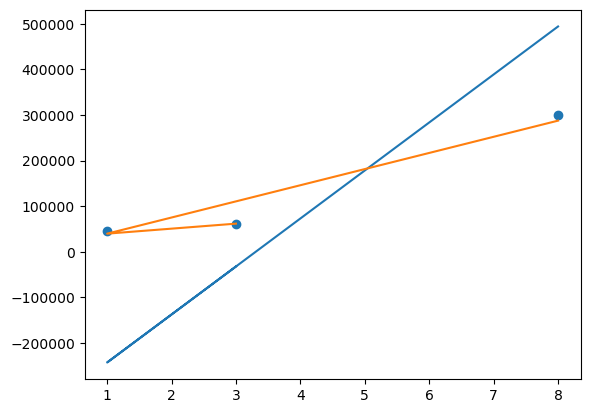

In [72]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)
plt.plot(x_test,y_poly_predict)
plt.show()

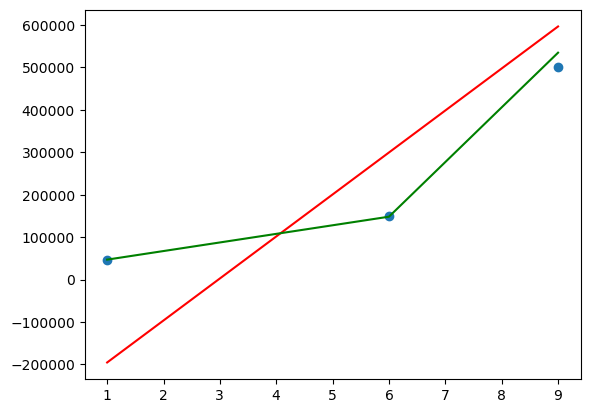

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

array([ 47014.83400916,  47124.23463931,  47263.16344879,  47436.17210049,
        47647.94562377,  47903.25337985,  48206.90233109,  48563.69317001,
        48978.37966438,  49455.63140477,  50000.00000001,  50615.88865094,
        51307.52494372,  52078.93663772,  52933.93017923,  53876.07164833,
        54908.66984132,  56034.76120354,  57257.09635465,  58578.12799059,
        60000.00000002,  61524.53769804,  63153.23915375,  64887.26766953,
        66727.44555756,  68674.24945041,  70727.80747738,  72887.8987336 ,
        75153.95556413,  77525.06927843,  80000.00000001,  82577.19144028,
        85254.79146293,  88030.67937423,  90902.50093334,  93867.7121241 ,
        96923.63276372, 100067.51104296, 103296.60009509, 106608.24767564,
       110000.00000001, 113469.72072985, 117015.72602001, 120636.93643462,
       124333.04641118, 128104.71179458, 131953.7557767 , 135883.39335991,
       139898.47421337, 144005.7435075 , 148214.11999257, 152534.99023116,
       156982.51749882, 1

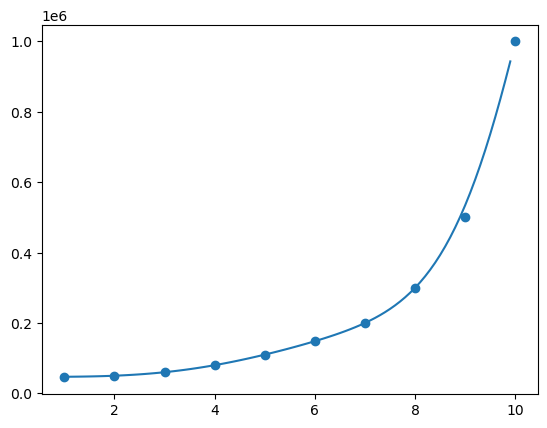

In [59]:
plt.scatter(x,y)
plt.plot(new_x,y_all)